# Sentiment Classification & Embedding II

* Embedding Layer
* Sequence Model

# 01. What data we use?

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import imdb

In [2]:
max_words = 40000
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words = max_words)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
word2idx = imdb.get_word_index()
idx2word = {val:key for key, val in word2idx.items()}

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
len(word2idx)

88584

In [6]:
" ".join(['a', 'bb'])

'a bb'

In [7]:
idx = 0
temp = x_train[idx]
## Sequence를 문장으로 복원하기.
print(" ".join([ idx2word[id] for id in temp   ]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room titillate it so heart shows to years of every never going villaronga help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but pratfalls to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other tricky in of seen over landed for anyone of gilmore's br show's to whether from than out themselves history he name half some br of 'n odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but whe

In [8]:
## 문장을 sequence로 바꿔보기
text = "this movie was so great"
text_tokenized = text.split()
seq = [ word2idx[word] for word in text_tokenized]
seq

[11, 17, 13, 35, 84]

# Q1. Tokenizing & Text to Sequences

* 상위 40000개 단어 사용하기로 했음.

In [23]:
### Tokenizer here


In [24]:
### Tokenizer here


In [25]:
# Text --> Sequence



# Padding Sequence

* 문장의 최대 길이는 500으로 한다.

In [29]:
#### Pad Sequences here
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [30]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [31]:
x_train.shape, x_test.shape

((25000, 500), (25000, 500))

# 모델링

**모델 구조**
1. 임베딩 레이어 : 임베딩차원은 196
2. Conv1D 블록 : 필터수 128개, 윈도우 사이즈 5
2. Conv1D 블록 : 필터수 128개, 윈도우 사이즈 5
6. MaxPool1D 블록 : 필터사이즈2
3. Bidirectional layer :
    * 정방향 : LSTM, 히든스테이트 64 
    * 역방향 : LSTM, 히든스테이트 64
6. MaxPool1D 블록 : 필터사이즈2
4. Bidirectional layer :
    * 정방향 : GRU, 히든스테이트 32
    * 역방향 : GRU, 히든스테이트 32
4. Bidirectional layer :
    * 정방향 : GRU, 히든스테이트 32
    * 역방향 : GRU, 히든스테이트 32    
6. MaxPool1D 블록 : 필터사이즈2
7. 플래튼
8. FC Layer : 노드 1024개
9. 시그모이드 레이어

In [33]:
#####################
## your codes here ##
#####################
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding
from tensorflow.keras.layers import Conv1D, MaxPool1D, Bidirectional, LSTM, GRU
from tensorflow.keras.models import Model

In [38]:
#####################
## your codes here ##
#####################

# 세션 클리어
K.clear_session()

# 0. Input
il = Input(shape=(max_len))
# 1. 임베딩 레이어 : 임베딩차원은 196
hl = Embedding(max_words, 196, input_length=max_len)(il)
# 2. Conv1D 블록 : 필터수 128개, 윈도우 사이즈 5
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
# 3. Conv1D 블록 : 필터수 128개, 윈도우 사이즈 5
hl = Conv1D(128, 5, padding='same', activation='swish')(hl)
# 4. MaxPool1D 블록 : 필터사이즈2
hl = MaxPool1D(2)(hl)
# 5. Bidirectional layer :
#     * 정방향 : LSTM, 히든스테이트 64 
#     * 역방향 : LSTM, 히든스테이트 64
hl = Bidirectional(LSTM(64, return_sequences=True))(hl)
# 6. MaxPool1D 블록 : 필터사이즈2
hl = MaxPool1D(2)(hl)
# 7. Bidirectional layer :
#     * 정방향 : GRU, 히든스테이트 32
#     * 역방향 : GRU, 히든스테이트 32
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
# 8. Bidirectional layer :
#     * 정방향 : GRU, 히든스테이트 32
#     * 역방향 : GRU, 히든스테이트 32    
hl = Bidirectional(GRU(32, return_sequences=True))(hl)
# 9. MaxPool1D 블록 : 필터사이즈2
hl = MaxPool1D(2)(hl)
# 10. 플래튼
hl = Flatten()(hl)
# 11. FC Layer : 노드 1024개
hl = Dense(1024, activation='swish')(hl)
# 12. 시그모이드 레이어
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 196)          7840000   
                                                                 
 conv1d (Conv1D)             (None, 500, 128)          125568    
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 128)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 250, 128)         98816     
 l)                                                          

# EarlyStopping을 이용한 학습.

1. 20%는 벨리데이션 셋.
2. 4epochs전과 비교하여 early stopping할 것.

In [39]:
#####################
## your codes here ##
#####################
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True, verbose=1)

In [40]:
#####################
## your codes here ##
#####################
history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, 
                    callbacks=[es], batch_size=1024)

Epoch 1/1000
20/20 [==============================] - 25s 617ms/step - loss: 0.6814 - accuracy: 0.5573 - val_loss: 0.6035 - val_accuracy: 0.6796
Epoch 2/1000
20/20 [==============================] - 9s 447ms/step - loss: 0.4057 - accuracy: 0.8102 - val_loss: 0.3375 - val_accuracy: 0.8626
Epoch 3/1000
20/20 [==============================] - 9s 456ms/step - loss: 0.1634 - accuracy: 0.9385 - val_loss: 0.2982 - val_accuracy: 0.8880
Epoch 4/1000
20/20 [==============================] - 9s 451ms/step - loss: 0.0656 - accuracy: 0.9783 - val_loss: 0.4404 - val_accuracy: 0.8830
Epoch 5/1000
20/20 [==============================] - 9s 455ms/step - loss: 0.0397 - accuracy: 0.9867 - val_loss: 0.6429 - val_accuracy: 0.8616
Epoch 6/1000
20/20 [==============================] - 10s 491ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.9433 - val_accuracy: 0.8700
Epoch 7/1000
20/20 [==============================] - 10s 490ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 1.3964 - val_accura

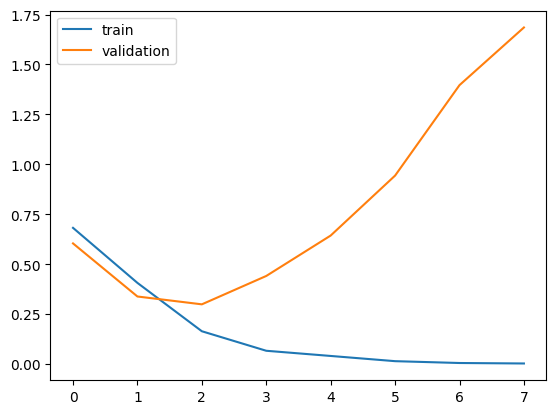

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Test셋 위에서 성능 관찰



In [43]:
#####################
## your codes here ##
#####################
model.evaluate(x_test, y_test)

782/782 [==============================] - 14s 18ms/step - loss: 0.3175 - accuracy: 0.8764


[0.3175148665904999, 0.8763599991798401]

In [ ]:
review_idx = 456

temp = test_data.loc[review_idx]
docu = temp['document']
label = 'positive' if temp['label'] ==1 else 'Negative'

print(f"문서 번호 {review_idx}")
print(label, " : ", docu)
y_pred = model.predict(x_test[review_idx:review_idx+1])
label_pred = 'positive' if y_pred[0,0] >=0.5 else 'Negative'
print(f"모델의 예측 : {label_pred},   prob = {y_pred[0,0]*100:.2f}%")

In [45]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [65]:
idx = 0
temp = x_test[idx][np.where(x_test[idx] != 0)]

print(f"idx : {idx}")
print(f"{y_test[idx]} : {' '.join([ idx2word[id] for id in temp])}")
y_pred = model.predict(x_test[idx : idx + 1])
print(f"모델의 예측 : {round(y_pred[0][0])}, prob = {y_pred[0][0] * 100 : .2f}")

idx : 0
0 : the wonder own as by is sequence i i jars roses to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world uncaring her an have faint beginning own as is sequence
1/1 [==============================] - 2s 2s/step
모델의 예측 : 0, prob =  6.88


In [66]:
idx = 1
temp = x_test[idx][np.where(x_test[idx] != 0)]

print(f"idx : {idx}")
print(f"{y_test[idx]} : {' '.join([ idx2word[id] for id in temp])}")
y_pred = model.predict(x_test[idx : idx + 1])
print(f"모델의 예측 : {round(y_pred[0][0])}, prob = {y_pred[0][0] * 100 : .2f}")

idx : 1
1 : the as you world's is quite br mankind most that quest are chase to being quickly of little it time hell to plot br of something long put are of every place this consequence council of interplay storytelling being nasty not of you warren in is failed club i i of films pay so sequences mightily film okay uses to received wackiness if time done for room sugar viewer as cartoon of gives to forgettable br be because many these of reflection sugar contained gives it wreck scene to more was two when had find as you another it of themselves probably who interplay storytelling if itself by br about 1950's films not would effects that her box to miike for if hero close seek end is very together movie of wheel got say kong sugar fred close bore there is playing lot of scriptures pan place trilogy of lacks br of their time much this men as on it is telling program br silliness okay orientation to frustration at corner rawlins she of sequences to political clearly in of drugs keep guy 